# **Inferencia estadística**
# IE12_2. Pruebas A/B - SOLUCION


## <font color='blue'>__Bibliografía__</font>
* Applied Statistics and Probability for Engineers. Douglas C. Montgomery, George C. Runger, 2013.

* Estadística para Administración y Economía. Paul Newbold, William L. Carlson y Betty Thorne, 2013.

* Estadística Aplicada a los Negocios y la Economía. Allen L. Webster, 2000.



## <font color='blue'>__Lecturas__</font>
* Sullivan GM, Feinn R. (2012). Using Effect Size-or Why the P Value Is Not Enough. J Grad Med Educ., 4(3):279-82. doi: 10.4300/JGME-D-12-00156.1 ***(leer ejemplo de Aspirina)***


In [112]:
# Otra forma de cargar archivos en COLAB
# El archivo 'marketing_AB.csv' debe estar en tu computador
# presiona 'Browse' u búscalo
# from google.colab import files
# file = files.upload()


In [113]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
colors = ['#F6BD60', '#F7EDE2', '#F5CAC3', '#84A59D', '#F28482']
sns.color_palette(colors)

[(0.9647058823529412, 0.7411764705882353, 0.3764705882352941),
 (0.9686274509803922, 0.9294117647058824, 0.8862745098039215),
 (0.9607843137254902, 0.792156862745098, 0.7647058823529411),
 (0.5176470588235295, 0.6470588235294118, 0.615686274509804),
 (0.9490196078431372, 0.5176470588235295, 0.5098039215686274)]

## **<font color="blue">1. Introducción al A/B Testing</font>**

### **1.1. ¿Qué es el A/B Testing?**  
El A/B Testing es un método experimental que permite comparar dos versiones de un producto, anuncio o estrategia para determinar cuál genera mejores resultados según una métrica específica (como la tasa de conversión). En este tipo de pruebas, los usuarios se dividen aleatoriamente en dos grupos:  
- **Grupo A (control):** recibe la versión estándar o actual.  
- **Grupo B (tratamiento):** recibe la nueva versión propuesta.  

El objetivo es identificar si la nueva versión (tratamiento) mejora significativamente los resultados frente a la versión control.

---

### **1.2. Objetivos del A/B Testing (¿Para qué se utiliza?)**  
El A/B Testing se utiliza para:  
- **Optimizar campañas publicitarias:** evaluar qué tipo de anuncio tiene un mayor impacto en conversiones.  
- **Mejorar la experiencia de usuario (UX):** comparar dos versiones de una página web o aplicación para medir cuál es más efectiva.  
- **Validar decisiones de negocio:** tomar decisiones basadas en evidencia y datos, en lugar de suposiciones o intuiciones.  
- **Evaluar intervenciones en salud:** se usa en ensayos clínicos para medir la efectividad de nuevos tratamientos o medicamentos.  

---

### **1.3. Breve historia del A/B Testing**  
El concepto de A/B Testing tiene sus raíces en la estadística y los experimentos controlados. Algunos hitos relevantes son:  
- **Siglo XVIII:** las primeras pruebas controladas surgen en el ámbito médico, como los ensayos clínicos para tratamientos.  
- **Años 1920:** Ronald Fisher, estadístico británico, popularizó el diseño de experimentos y los conceptos de hipótesis nula y alternativa.  
- **Década de 2000:** con la digitalización, empresas como Google y Amazon implementaron A/B Testing para mejorar sus plataformas.  
- **Actualidad:** el A/B Testing se ha convertido en una herramienta clave en áreas como marketing digital, diseño UX, y optimización de productos.  

---

### **1.4. Casos de uso comunes del A/B Testing**  

- **Marketing digital:** evaluar diferentes versiones de anuncios para medir cuál genera más clics o conversiones.  
- **Optimización UX:** probar variantes de una página de inicio para aumentar el tiempo de permanencia de los usuarios.  
- **Estrategias de precios:** evaluar el impacto de cambios en los precios de productos sobre las ventas.  
- **Plataformas de streaming:** medir qué versión de un contenido recomendado fomenta más visualizaciones.  
- **Ensayos clínicos:** medir la efectividad de un nuevo tratamiento médico frente al tratamiento estándar.  



## **<font color='blue'>2. Conceptos Fundamentales del A/B Testing</font>**

Este apartado cubre los conceptos esenciales necesarios para realizar un A/B Testing, incluyendo las hipótesis, métricas clave y tipos de pruebas.  


A lo largo del notebook, utilizaremos un **ejemplo práctico** basado en un experimento publicitario. En este experimento, se comparan dos tipos de anuncios:  

- **PSA (Public Service Announcement - Anuncio de Servicio Público):**  
  Estos son anuncios que no tienen fines comerciales, sino que buscan educar o informar a la población sobre temas de interés público, como seguridad vial, cuidado del medio ambiente o salud. Ejemplos:
  - Un anuncio que informa sobre la importancia de la alfabetización digital en zonas rurales, explicando cómo acceder gratuitamente a clases online patrocinadas por una institución pública para reducir la brecha digital.
  - Un anuncio de una universidad que invita a estudiantes a participar gratuitamente en un webinar informativo sobre el proceso de postulación a becas y financiamiento, con el objetivo de aumentar las postulaciones al programa de admisión.

- **Anuncio Publicitario Comercial:**  
  Son anuncios cuyo objetivo principal es persuadir a los usuarios para realizar una acción que beneficie económicamente a la organización, como comprar un producto o contratar un servicio. Ejemplos:
  - Un anuncio de una academia online que promociona cursos de habilidades digitales, como programación o análisis de datos, ofreciendo un 30% de descuento por inscripción anticipada.
  - Un anuncio de una tienda de libros que promueve un paquete de libros sobre desarrollo personal con un 2x1 en compras realizadas durante la semana de aniversario de la tienda.

El objetivo del experimento es determinar si los **anuncios publicitarios comerciales** generan una mayor tasa de conversión que los **anuncios de servicio público** (PSAs).

---

### **2.1. Hipótesis Nula (H₀) y Alternativa (H₁)**  
En un A/B Testing se plantean dos hipótesis:  
- **Hipótesis nula (H₀):** plantea que no existe diferencia significativa entre los grupos de control y tratamiento.  
  - Ejemplo: *"La tasa de conversión del grupo con anuncios publicitarios es igual a la del grupo con PSAs."*  
  - Matemáticamente:  
    $$  
    H₀: p_{\text{ads}} - p_{\text{PSA}} = 0  
    $$  

- **Hipótesis alternativa (H₁):** establece que existe una diferencia significativa entre ambos grupos.  
  - Ejemplo: *"La tasa de conversión del grupo con anuncios publicitarios es mayor que la del grupo con PSAs."*  
  - Matemáticamente (prueba unilateral):  
    $$  
    H₁: p_{\text{ads}} - p_{\text{PSA}} > 0  
    $$  

---

### **2.2. Grupos de Comparación**  
En un A/B Testing, los usuarios se dividen en dos grupos de forma aleatoria:  
- **Grupo de control:** recibe la versión actual o estándar (en este caso, los PSAs).  
- **Grupo de tratamiento:** recibe la versión nueva o propuesta (en este caso, los anuncios publicitarios).  

El objetivo es medir si el grupo de tratamiento presenta un mejor desempeño en función de una métrica clave.

---

### **2.3. Métricas Clave en A/B Testing**  
Las métricas más relevantes en un A/B Testing incluyen:  

- **Tasa de conversión ($CR$):** proporción de usuarios que realizaron la acción objetivo respecto al total de usuarios:  
  $$  
  CR = \frac{\text{Usuarios que convierten}}{\text{Total de usuarios}}  
  $$  

- **Diferencia absoluta de conversión:** diferencia directa entre la tasa de conversión del grupo de tratamiento y del grupo de control:  
  $$  
  \Delta CR = CR_{\text{ads}} - CR_{\text{PSA}}  
  $$  

- **Lift o aumento relativo (%):** porcentaje de mejora de la tasa de conversión del grupo de tratamiento frente al grupo de control:  
  $$  
  \text{Lift (\%)} = \frac{CR_{\text{ads}} - CR_{\text{PSA}}}{CR_{\text{PSA}}} \times 100  
  $$  

- **Retorno de inversión (ROI):** mide el beneficio económico en relación con la inversión:  
  $$  
  ROI = \frac{\text{Beneficio neto}}{\text{Costo total}} \times 100  
  $$  

---

### **2.4. Tipos de Pruebas A/B**  
Existen diferentes tipos de pruebas A/B según el objetivo del experimento:  
- **Prueba A/B simple:** compara dos versiones (e.g., PSA vs anuncios publicitarios).  
- **Pruebas A/B multivariadas:** evalúan el impacto de varios elementos (como texto, imágenes y llamados a la acción).  
- **Testeo de frecuencia:** mide la cantidad óptima de exposiciones a un anuncio antes de que el beneficio adicional comience a disminuir.  




## **<font color='blue'>3. Ejercicio práctico de A/B Testing</font>**

En este notebook realizaremos una **prueba A/B simple** para evaluar la efectividad de los anuncios publicitarios comerciales en comparación con los anuncios de servicio público (PSAs). Nuestro objetivo es analizar si existe una diferencia significativa en las tasas de conversión entre ambos tipos de anuncios y determinar si los anuncios comerciales generan un impacto positivo lo suficientemente relevante como para justificar su implementación.

### __3.1 Cargar la data__

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
 # Leer el archivo CSV. El mismo tiene una columna de índice predefinida
# por eso usamos index_col=0 para que no la cree como una columna de datos
ad_campaign = pd.read_csv('/content/drive/Othercomputers/Mi PC/Diplomado Ciencia de datos UDD/4. Inferencia estadística/files/marketing_AB.csv', index_col=0)

# Renombrar columnas para estandarizar los nombres
ad_campaign.rename(columns={
    'user id': 'user_id',
    'test group': 'test_group',
    'total ads': 'total_ads',
    'most ads day': 'most_ads_day',
    'most ads hour': 'most_ads_hour'
}, inplace=True)

In [117]:
ad_campaign.head(3)

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18


### __3.2 EDA__

#### __Chequeo de tipos de datos__
Revisar los tipos de datos para evitar errores durante el análisis.

In [118]:
ad_campaign.info()

<class 'pandas.core.frame.DataFrame'>
Index: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        588101 non-null  int64 
 1   test_group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total_ads      588101 non-null  int64 
 4   most_ads_day   588101 non-null  object
 5   most_ads_hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 27.5+ MB


`converted` debe ser convertido a `int`.

#### __Chequeo de consistencia__
Es importante verificar que las columnas relevantes tengan los valores esperados. Algunos puntos clave a revisar:  
- **Etiquetas del grupo de prueba:** verificar que los valores de `test_group` sean `"ad"` (grupo de tratamiento) o `"psa"` (grupo de control).  
- **Valores de conversión (`converted`):** deben ser valores booleanos (True/False o 1/0).  
- Chequeamos consistencia de valores en `most_ads_day`, `mont_ads_hours` y `test_group`.



In [119]:
ad_campaign['converted'].unique()

array([False,  True])

In [120]:
ad_campaign['most_ads_day'].unique()

array(['Monday', 'Tuesday', 'Friday', 'Saturday', 'Wednesday', 'Sunday',
       'Thursday'], dtype=object)

In [121]:
np.sort(ad_campaign['most_ads_hour'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [122]:
ad_campaign['test_group'].unique()

array(['ad', 'psa'], dtype=object)

#### __Chequeo de valores nulos (*missing values*)__

Los valores nulos pueden afectar el análisis estadístico. Es necesario identificarlos y decidir cómo manejarlos:
- Si la cantidad de valores nulos es baja (< 1%), se pueden eliminar.
- Si la cantidad de valores nulos es moderada (1-5%), se deben investigar y decidir si es apropiado eliminarlos.
- Si hay más del 5%, se deben imputar o mantener, dependiendo de su relevancia.

In [123]:
ad_campaign.isna().sum()

,0
user_id,0
test_group,0
converted,0
total_ads,0
most_ads_day,0
most_ads_hour,0


In [124]:
# Calcular los cuantiles de los datos
Q1 = ad_campaign['total_ads'].quantile(0.25)  # Primer cuartil (25%)
Q3 = ad_campaign['total_ads'].quantile(0.75)  # Tercer cuartil (75%)
IQR = Q3 - Q1  # Rango intercuartil (IQR)

# Calcular los límites inferior y superior para identificar outliers
down_limit = Q1 - 1.5 * IQR  # Límite inferior
upper_limit = Q3 + 1.5 * IQR  # Límite superior

# Identificar los outliers
outliers = ad_campaign[(ad_campaign['total_ads'] < down_limit) | (ad_campaign['total_ads'] > upper_limit)]

# Contar el número de outliers
n_outliers = len(outliers)  # Número de registros identificados como outliers
total_records = len(ad_campaign)  # Número total de registros en el dataset
outlier_percentage = (n_outliers / total_records) * 100  # Porcentaje de outliers respecto al total

# Imprimir resultados
print(f"Número total de registros: {total_records}")
print(f"Número de outliers: {n_outliers}")
print(f"Porcentaje de outliers: {outlier_percentage:.2f}%")

Número total de registros: 588101
Número de outliers: 52057
Porcentaje de outliers: 8.85%


Veamos un análisis comparativo entre los valores atípicos (outliers) y los valores normales (non-outliers) en la columna `total_ads`, que representa la cantidad de anuncios vistos por los usuarios.

Los datos muestran una gran diferencia en la cantidad de anuncios vistos entre los outliers y los non-outliers. Mientras que la media de los outliers es de 124.57 anuncios con un máximo extremo de 2065, la media de los datos sin outliers es de apenas 15.13, con un máximo de 61. Esto indica que los outliers representan usuarios con exposiciones anómalamente altas, lo que podría distorsionar el análisis si no se filtran adecuadamente.

In [125]:
# Estadísticas básicas de datos con y sin outliers
print('Datos con Outliers')
print(outliers['total_ads'].describe())
print('\nDatos sin outliers')
print(ad_campaign[~ad_campaign.index.isin(outliers.index)]['total_ads'].describe())

Datos con Outliers
count    52057.000000
mean       124.568915
std         92.934439
min         62.000000
25%         74.000000
50%         94.000000
75%        136.000000
max       2065.000000
Name: total_ads, dtype: float64

Datos sin outliers
count    536044.000000
mean         15.134015
std          14.063618
min           1.000000
25%           4.000000
50%          11.000000
75%          22.000000
max          61.000000
Name: total_ads, dtype: float64


Visualicemos.

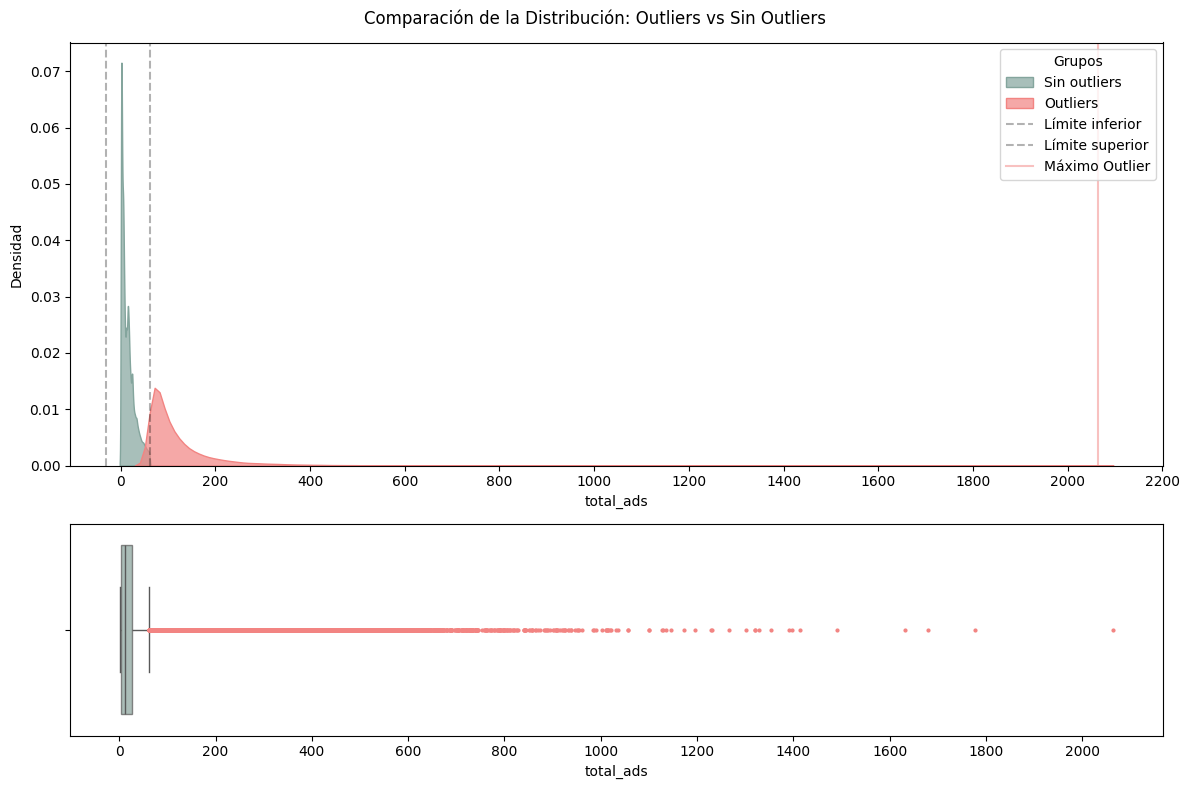

In [126]:
import matplotlib.ticker as ticker  # Importación necesaria para usar MultipleLocator

# Visualización de la distribución de 'total ads'

# Crear una figura con dos subgráficos (subplots)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), height_ratios=[2, 1])

# Primer subplot: Gráficos de densidad (KDE) para datos sin outliers y con outliers
sns.kdeplot(
    data=ad_campaign[~ad_campaign.index.isin(outliers.index)]['total_ads'],  # Datos sin outliers
    label='Sin outliers',  # Etiqueta para la leyenda
    fill=True,  # Relleno del área bajo la curva
    alpha=0.7,  # Transparencia del relleno
    color=colors[3],  # Color personalizado
    ax=ax1  # Subgráfico donde se dibuja
)

sns.kdeplot(
    data=outliers['total_ads'],  # Datos con outliers
    label='Outliers',  # Etiqueta para la leyenda
    fill=True,  # Relleno del área bajo la curva
    alpha=0.7,  # Transparencia del relleno
    color=colors[4],  # Color personalizado para los outliers
    ax=ax1  # Subgráfico donde se dibuja
)

# Líneas verticales para los límites de los outliers en el primer subgráfico
ax1.axvline(x=down_limit, color='black', linestyle='--', alpha=0.3, label='Límite inferior')  # Límite inferior
ax1.axvline(x=upper_limit, color='black', linestyle='--', alpha=0.3, label='Límite superior')  # Límite superior
ax1.axvline(x=outliers['total_ads'].max(), linestyle='-', alpha=0.5, label='Máximo Outlier', color=colors[4])  # Máximo outlier

# Personalización del primer subgráfico
ax1.set_xlabel('total_ads')  # Etiqueta del eje X
ax1.set_ylabel('Densidad')  # Etiqueta del eje Y
ax1.xaxis.set_major_locator(ticker.MultipleLocator(200))  # Intervalo de las marcas principales en el eje X
ax1.legend(title='Grupos', loc='upper right')  # Leyenda en la esquina superior derecha

# Segundo subplot: Diagrama de caja (boxplot) para visualizar la distribución de 'total_ads'
sns.boxplot(
    x=ad_campaign['total_ads'],  # Datos para el diagrama de caja
    ax=ax2,  # Subgráfico donde se dibuja
    color=colors[3],  # Color del boxplot
    boxprops=dict(alpha=.7),  # Transparencia del boxplot
    linewidth=1,  # Grosor de las líneas del boxplot
    flierprops={  # Propiedades de los "flier" (puntos atípicos)
        'marker': 'o',  # Forma de los puntos
        'markersize': 2,  # Tamaño de los puntos
        'markerfacecolor': colors[4],  # Color de relleno de los puntos
        'markeredgecolor': colors[4]  # Color del borde de los puntos
    }
)

# Etiqueta del eje X en el segundo subgráfico
ax2.set_xlabel('total_ads')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(200))  # Intervalo de las marcas en el eje X

# Título de la figura
fig.suptitle('Comparación de la Distribución: Outliers vs Sin Outliers')
# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()

### **<font color='green'>Actividad 1</font>**

Analice el impacto de los outliers en las tasas de conversión del experimento A/B. Su objetivo será calcular las tasas de conversión con y sin outliers, comparar los resultados y justificar si los outliers deben ser eliminados del análisis.

#### **Instrucciones:**
1. **Cálculo de tasas de conversión:**
   - Calcular la tasa de conversión general utilizando todo el dataset (`ad_campaign`).
   - Calcular la tasa de conversión utilizando el dataset limpio (`no_outliers_df`), que excluye los outliers.
   
2. **Cálculo de la diferencia relativa:**
   - Comparar ambas tasas y calcular la diferencia relativa entre ellas.

3. **Análisis de la conversión entre los outliers:**
   - Calcular el porcentaje de usuarios que convirtieron entre los outliers de cada grupo (`'ad'` y `'psa'`).
   - Interpretar si la cantidad de anuncios vistos por los outliers tiene un impacto proporcional en las conversiones.

4. **Conclusión y justificación:**
   - Responder: ¿Se recomienda eliminar los outliers del dataset? Justificar la respuesta basándose en los resultados obtenidos.


In [127]:
"""
1. Cálculo de tasas de conversión
"""
CR = sum(ad_campaign['converted'])/len(ad_campaign)
print(
    f"Tasa de conversión considerando outlier: "
    f"  {CR:.5f}."
)
no_outliers_df = ad_campaign[
    (ad_campaign['total_ads'] >= down_limit) &
     (ad_campaign['total_ads'] <= upper_limit)]
CR_no_outliers = sum(no_outliers_df['converted'])/len(ad_campaign)
print(
    f"Tasa de conversión sin considerar outlier: "
    f"{CR_no_outliers:.5f}."
)

Tasa de conversión considerando outlier:   0.02524.
Tasa de conversión sin considerar outlier: 0.01210.


In [128]:
"""
2. Cálculo de la diferencia relativa
"""
print(
    f"La diferencia real entre las tasas de conversiones con y sin outliers "
    f"es:     {CR - CR_no_outliers:.5f}."
)
print(
    f"La diferencia relativa entre las tasas de conversiones con y sin outliers "
    f"es: {(CR - CR_no_outliers)/CR:.5f}."
)

La diferencia real entre las tasas de conversiones con y sin outliers es:     0.01314.
La diferencia relativa entre las tasas de conversiones con y sin outliers es: 0.52065.


La tasa de conversión desde ad entre los outliers es de 0.14473.
La tasa de conversión desde psa entre los outliers es de 0.00373.


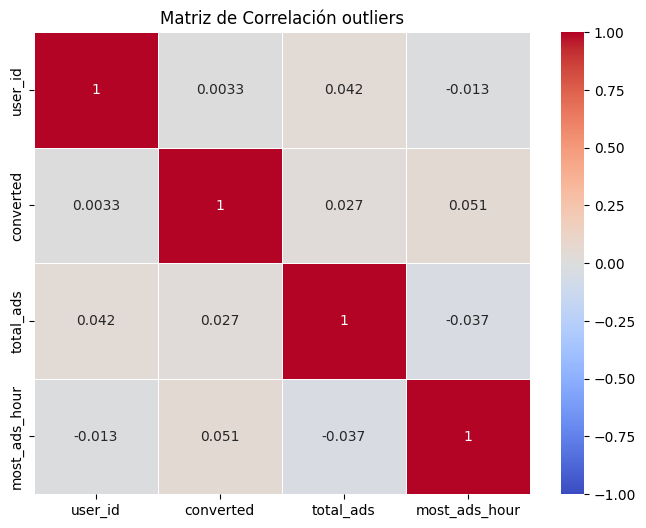

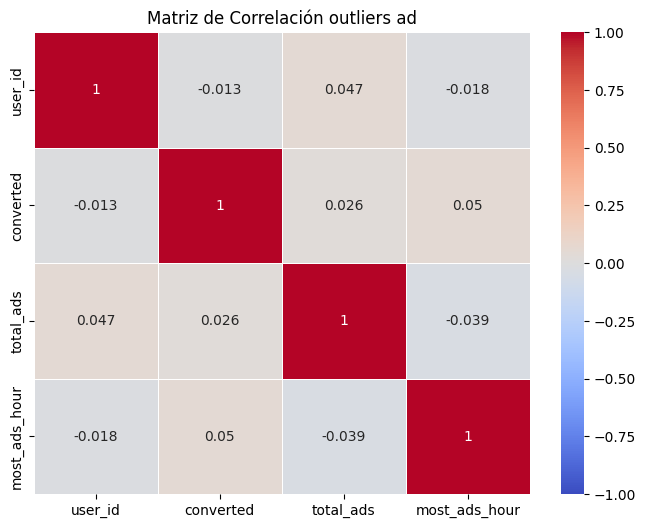

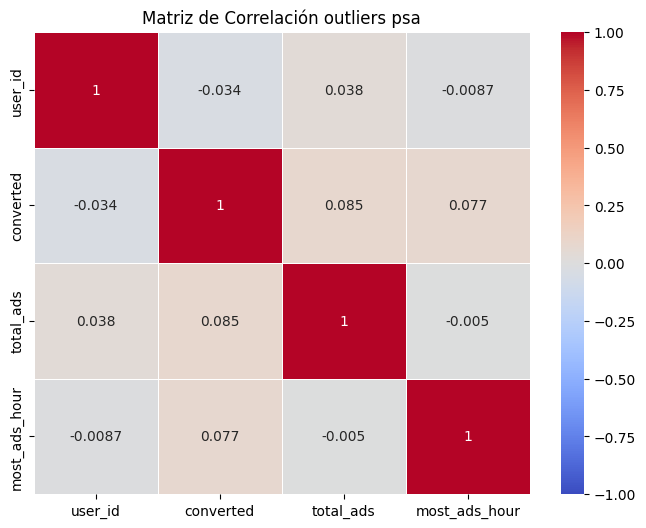

In [129]:
"""
3. Análisis de la conversión entre los outliers
"""
ad_to_psa = len(outliers[(outliers['converted']) & (outliers['test_group']=='ad')])/len(outliers)
psa_to_ad = len(outliers[(outliers['converted']) & (outliers['test_group']=='psa')])/len(outliers)
print(
    f"La tasa de conversión desde ad entre los outliers es de {ad_to_psa:.5f}."
)
print(
    f"La tasa de conversión desde psa entre los outliers es de {psa_to_ad:.5f}."
)


# Graficar la matriz de correlación con un mapa de calor
plt.figure(figsize=(8, 6))  # Tamaño de la figura
sns.heatmap(outliers.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

# Mostrar el gráfico
plt.title('Matriz de Correlación outliers')
plt.show()

# Graficar la matriz de correlación con un mapa de calor
plt.figure(figsize=(8, 6))  # Tamaño de la figura
sns.heatmap(outliers[outliers['test_group']=='ad'].corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

# Mostrar el gráfico
plt.title('Matriz de Correlación outliers ad')
plt.show()


# Graficar la matriz de correlación con un mapa de calor
plt.figure(figsize=(8, 6))  # Tamaño de la figura
sns.heatmap(outliers[outliers['test_group']=='psa'].corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

# Mostrar el gráfico
plt.title('Matriz de Correlación outliers psa')
plt.show()

Podemos concluir que para ninguno de los grupos hay un porcentaje elevado en la tasa de conversión, y que tampoco ni en el caso global, ni en el separado por grupos, existe alguna variable correlacionada con la variable `converted`, con lo cual se opta por eliminar los outliers.

<font color='green'>Fin actividad 1</font>

#### __Convirtiendo los Data types__

In [130]:
ad_campaign['converted'] = ad_campaign['converted'].astype(int)

#### __Crear un nuevo dataset sin outliers__


In [131]:
ad_campaign_clean = ad_campaign[~((ad_campaign['total_ads'] < down_limit) | (ad_campaign['total_ads'] > upper_limit))]
ad_campaign_clean = ad_campaign_clean.reset_index(drop=True)
ad_campaign_clean.head(3)

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1144181,ad,0,21,Tuesday,18
1,1496843,ad,0,17,Sunday,18
2,1448851,ad,0,21,Tuesday,19


### __3.3 Diseño del experimento A/B__
En este paso se evalúa la **efectividad de la campaña** en el contexto de A/B testing para comprobar si existe una diferencia estadísticamente significativa en las tasas de conversión entre los dos grupos: el grupo de tratamiento (grupo de anuncios) y el grupo de control (grupo de anuncios de servicio público o PSA).

#### __Objetivo__
Determinar si la tasa de conversión del grupo de anuncios es significativamente mayor que la del grupo PSA.

#### __Hipótesis__
- **Hipótesis nula (H₀):** No hay diferencias en las tasas de conversión entre los dos grupos (p_ad - p_psa = 0).
- **Hipótesis alternativa (H₁):** La tasa de conversión del grupo de anuncios es mayor (p_ad - p_psa > 0).

#### __Plan de Análisis__
1. Realizar la prueba estadística adecuada.
2. Verificar los supuestos de la prueba:
   - **Normalidad:** Las muestras son lo suficientemente grandes ($np \ge 10$ y $n(1-p) \ge 10$).
   - **Independencia:** Las observaciones dentro y entre los grupos son independientes.
   - **Muestreo aleatorio:** Los datos deben haber sido seleccionados al azar.
3. Si los supuestos no se cumplen, cambiar a una prueba no paramétrica (prueba de `Chi-cuadrado`).
4. Analizar los resultados.

#### __Método Utilizado__
Se utiliza una **prueba Z para dos proporciones**, un estándar en la optimización de tasas de conversión (CRO, por sus siglas en inglés).

#### __Métricas de Resultados__
- **Diferencias absolutas:** Comparación directa de las tasas de conversión entre los grupos.
- **Intervalos de confianza:** Margen en el que se espera que se encuentre la diferencia real de las tasas.
- **Tamaño del efecto (Cohen's h):** Magnitud de la diferencia en proporciones.
- **Análisis de poder:** Evaluación de la capacidad de la prueba para detectar un efecto si este existe.

Este paso corresponde a la fase de **prueba de hipótesis** en los experimentos de A/B testing, cuyo objetivo principal es evaluar la efectividad de un tratamiento en comparación con el control.


Se separan los datos en dos grupos (tratamiento y control) para comparar sus tasas de conversión y evaluar si existe una diferencia estadísticamente significativa entre ambos.

In [132]:
# Creamos grupos separados
treatment_group = ad_campaign_clean[ad_campaign_clean['test_group'] == 'ad']
control_group = ad_campaign_clean[ad_campaign_clean['test_group'] == 'psa']

A continuación se calcula y compara las tasas de conversión de los grupos de tratamiento y control, mostrando la diferencia absoluta y el incremento relativo para medir el impacto de la intervención.

In [133]:
# Calcular las tasas de conversión en ambos grupos (tratamiento y control)
treatment_conversion_rate = (treatment_group['converted'] == True).mean()
print(f'Tasa de conversión del grupo de tratamiento: {treatment_conversion_rate:.2%}')

control_conversion_rate = (control_group['converted'] == True).mean()
print(f'Tasa de conversión del grupo de control: {control_conversion_rate:.2%}')

# Calcular la diferencia absoluta y el aumento relativo en la conversión
diff = treatment_conversion_rate - control_conversion_rate
print(f'\nDiferencia absoluta: {diff:.2%}')

rel_lift = ((treatment_conversion_rate - control_conversion_rate) / control_conversion_rate)
print(f'Aumento relativo en la conversión: {rel_lift:.2%}')

Tasa de conversión del grupo de tratamiento: 1.34%
Tasa de conversión del grupo de control: 1.06%

Diferencia absoluta: 0.28%
Aumento relativo en la conversión: 26.31%


- Diferencia absoluta: 0.28% mayor tasa de conversión en el grupo de anuncios.
- En promedio, el grupo de anuncios convierte un 26.3% mejor que el grupo PSA (esto debe considerarse junto con la baja tasa de conversión base).

#### __Verificación de supuestos__
Este código evalúa si los datos cumplen con los supuestos necesarios para realizar una prueba paramétrica (prueba Z para dos proporciones). Calcula la normalidad revisando que las muestras sean lo suficientemente grandes ($np ≥ 10$ y $n(1-p) ≥ 10$), verifica la independencia comprobando la ausencia de duplicados dentro de los grupos y solapamientos entre ellos, y compara los tamaños de los grupos mediante su proporción. Si se cumplen todos los criterios, imprime que se puede realizar la prueba Z; de lo contrario, recomienda realizar una prueba no paramétrica Chi-cuadrado.

In [134]:
# 1. Normalidad
n_control = len(control_group)
p_control = control_group['converted'].mean()
# Varianza esperada del número de éxitos y fracasos en el grupo de control
control_assumption = n_control * p_control * (1 - p_control)

n_treatment = len(treatment_group)
p_treatment = treatment_group['converted'].mean()
# Varianza esperada del número de éxitos y fracasos en el grupo de tratamiento
treatment_assumption = n_treatment * p_treatment * (1 - p_treatment)

# 2. Independencia
# - Duplicados dentro de los grupos
duplicates_treatment = treatment_group['user_id'].duplicated().sum()
duplicates_control = control_group['user_id'].duplicated().sum()

# - Duplicados entre los grupos (solapamiento)
treatment_users = set(treatment_group['user_id'])
control_users = set(control_group['user_id'])
overlapping_users_num = len(treatment_users.intersection(control_users))

# Calcular la proporción de tamaños de los grupos
ratio = n_treatment / n_control
print(f'Relación de tamaños Tratamiento/Control: {ratio:.2f}')

# Verificación de las condiciones para la prueba paramétrica
if (control_assumption >= 10 and treatment_assumption >= 10 and
    duplicates_treatment == 0 and duplicates_control == 0 and
    overlapping_users_num == 0):
    print('Los supuestos para una prueba paramétrica se cumplen. Realice la prueba Z para dos proporciones.')
else:
    print('Los supuestos para una prueba paramétrica NO se cumplen. Realice la prueba de homogeneidad Chi-cuadrado.')

Relación de tamaños Tratamiento/Control: 24.13
Los supuestos para una prueba paramétrica se cumplen. Realice la prueba Z para dos proporciones.


La independencia se verifica asegurando que no existan duplicados dentro de los grupos ni solapamientos entre ellos. Primero, se evalúa la independencia dentro de los grupos al contar los usuarios repetidos en los identificadores de cada grupo; si hay duplicados, significa que un mismo usuario aparece más de una vez, lo que puede sesgar los resultados. Luego, se verifica la independencia entre los grupos comparando los conjuntos de usuarios únicos de cada grupo y calculando la intersección; si existen usuarios presentes en ambos grupos, esto indica un solapamiento que viola la independencia de las observaciones, ya que algunos usuarios fueron expuestos a ambas condiciones.

El `ratio` corresponde a la proporción de tamaños entre el grupo de tratamiento y el grupo de control, indicando cuántas veces uno de los grupos es más grande que el otro. Este cálculo es importante para evaluar si los grupos están balanceados en tamaño, ya que una proporción cercana a 1 indica que los grupos son similares. En las pruebas A/B, mantener tamaños equilibrados minimiza posibles sesgos y mejora la precisión de la prueba estadística. Si el ratio es muy diferente de 1, podría haber un impacto en la interpretación de los resultados, ya que un grupo desproporcionadamente grande podría dominar el análisis.

El valor de $ratio = 24$, significa que el grupo de tratamiento es 24 veces más grande que el grupo de control, lo que indica un desequilibrio significativo en los tamaños de los grupos. Este desbalance puede generar problemas, como una pérdida de precisión en las estimaciones y un aumento en la probabilidad de errores estadísticos. En pruebas A/B, mantener un ratio cercano a 1 suele ser ideal para asegurar resultados más fiables.

#### __Ejecutando la prueba Z__
Este paso realiza la prueba $Z$ para dos proporciones, que evalúa si la tasa de conversión del grupo de tratamiento (usuarios que vieron los anuncios) es significativamente mayor que la del grupo de control (usuarios que vieron los PSA). Primero, se cuentan los éxitos (conversiones) en ambos grupos y se obtienen los tamaños de muestra. Luego, se calculan las proporciones de conversión de cada grupo. Finalmente, se aplica la prueba $Z$ unidireccional (`alternative='larger'`), que evalúa si la proporción del grupo de anuncios es significativamente mayor que la del grupo PSA. Si el valor $p$_value es menor a 0.05, se rechaza la hipótesis nula y se concluye que el grupo de anuncios tiene una tasa de conversión significativamente más alta. De lo contrario, no se puede afirmar con evidencia estadística que el grupo de anuncios tenga un mejor desempeño.

In [135]:
# Preparación de los datos
# Contar los éxitos (conversiones)
successes = [
    sum(treatment_group['converted'] == True),    # número de conversiones en el grupo de anuncios
    sum(control_group['converted'] == True)       # número de conversiones en el grupo de PSA
]

# Obtener los tamaños de las muestras
nobs = [
    len(treatment_group),    # número total de usuarios en el grupo de anuncios
    len(control_group)       # número total de usuarios en el grupo de PSA
]

# Calcular las proporciones de conversión
p_ad = successes[0] / nobs[0]
p_psa = successes[1] / nobs[1]

# Realizar la prueba Z para dos proporciones (unidireccional)
from statsmodels.stats.proportion import proportions_ztest, confint_proportions_2indep
z_stat, p_value = proportions_ztest(count=successes,
                                    nobs=nobs,
                                    alternative='larger')  # prueba unidireccional: si la proporción del grupo de anuncios es mayor

if p_value < 0.05:
    print("""Se rechaza la hipótesis nula:
    El grupo de anuncios tiene una tasa de conversión significativamente más alta que el grupo PSA.
    La campaña de anuncios muestra una mejora estadísticamente significativa.""")
else:
    print("""No se puede rechazar la hipótesis nula:
    No hay evidencia estadísticamente significativa de que el grupo de anuncios tenga una tasa de
    conversión más alta que el grupo PSA.""")

Se rechaza la hipótesis nula:
    El grupo de anuncios tiene una tasa de conversión significativamente más alta que el grupo PSA.
    La campaña de anuncios muestra una mejora estadísticamente significativa.


Podemos afirmar con un 95% de confianza que el grupo de anuncios tiene una tasa de conversión significativamente más alta que el grupo PSA.

#### __Intervalo de Confianza en la Tasa de Conversión__

En este paso, calcularemos el intervalo de confianza (IC) del 95% para la diferencia en las tasas de conversión entre los grupos de tratamiento (anuncios) y control (PSA). El objetivo es obtener un rango de valores dentro del cual se espera que esté la verdadera diferencia con un 95% de confianza. Esto nos permitirá cuantificar la precisión de la estimación de la diferencia y verificar si el resultado de la prueba es consistente. Si el intervalo no incluye el valor 0, podemos afirmar que la diferencia es significativa, lo que refuerza el resultado de la prueba $Z$.

In [136]:
# Calcular el intervalo de confianza (IC)
ci = confint_proportions_2indep(
    count1=successes[0],  # éxitos en el grupo de anuncios (tratamiento)
    nobs1=nobs[0],        # total de usuarios en el grupo de anuncios
    count2=successes[1],  # éxitos en el grupo de PSA (control)
    nobs2=nobs[1],        # total de usuarios en el grupo de PSA
    alpha=0.05            # para un IC del 95%
)

print(f'IC del 95% para la diferencia de proporciones: ({ci[0]:.2%} - {ci[1]:.2%})')
print(f'\nDiferencia actual en la tasa de conversión: {diff:.2%}')

IC del 95% para la diferencia de proporciones: (0.13% - 0.41%)

Diferencia actual en la tasa de conversión: 0.28%


El intervalo de confianza (IC) del 95% representa el rango esperado para la diferencia real en las tasas de conversión entre el grupo de anuncios y el grupo PSA. Si los valores del intervalo son positivos, indica que la tasa de conversión del grupo de anuncios es mayor. Por ejemplo, un intervalo de (0.13%, 0.41%) significa que, con un 95% de confianza, la verdadera diferencia en la tasa de conversión se encuentra entre un 0.13% y un 0.41% a favor del grupo de anuncios, lo que refleja un efecto positivo consistente de la campaña. La diferencia observada en la muestra (0.28%) está aproximadamente en el centro del intervalo, reforzando la conclusión de que el resultado no es producto del azar. Por el contrario, si el intervalo incluyera el valor 0, no podríamos asegurar que exista una diferencia significativa, ya que ello indicaría que la diferencia podría ser nula y cualquier variación observada podría deberse al azar.

### <font color='green'>__Actividad 2__</font>

Se ha realizado una prueba A/B para evaluar la efectividad de un anuncio en comparación con un mensaje informativo. Inicialmente, se observó un desbalance en los tamaños de los grupos, con una proporción de 24:1 entre el grupo de tratamiento (anuncios) y el grupo de control (PSA).


1. Submuestreo: Ajusta el tamaño del grupo de tratamiento para igualarlo al del grupo de control utilizando una muestra aleatoria.
2. Prueba estadística: Repite la prueba Z para dos proporciones con los datos ajustados y calcula el intervalo de confianza (IC) del 95% para la diferencia en las tasas de conversión.
3.Comparación de resultados: Compara los resultados antes y después del ajuste, respondiendo las siguientes preguntas:
    - ¿Cómo cambió el p-valor tras el ajuste de los tamaños de muestra?
	- ¿El intervalo de confianza es más estrecho o más amplio? ¿Qué implica este cambio?
	- ¿Se mantiene la diferencia significativa en las tasas de conversión después de equilibrar los grupos?

Finalmente, reflexiona sobre la importancia de mantener un balance en los tamaños de muestra para obtener conclusiones precisas y confiables en los experimentos A/B.

In [139]:
# Submuestreo

treatment_group_balanced = treatment_group.sample(len(control_group))
# print(len(treatment_group)/len(control_group))

# Preparación de los datos
# Contar los éxitos (conversiones)
successes_balanced = [
    sum(treatment_group_balanced['converted'] == True),    # número de conversiones en el grupo de anuncios
    sum(control_group['converted'] == True)       # número de conversiones en el grupo de PSA
]

# Obtener los tamaños de las muestras
nobs_balanced = [
    len(treatment_group_balanced),    # número total de usuarios en el grupo de anuncios
    len(control_group)       # número total de usuarios en el grupo de PSA
]

# Calcular las proporciones de conversión
p_ad_balanced = successes_balanced[0] / nobs_balanced[0]
p_psa_balanced = successes_balanced[1] / nobs_balanced[1]

# Realizar la prueba Z para dos proporciones (unidireccional)
from statsmodels.stats.proportion import proportions_ztest, confint_proportions_2indep
z_stat_balanced, p_value_balanced = proportions_ztest(count=successes_balanced,
                                    nobs=nobs_balanced,
                                    alternative='larger')  # prueba unidireccional: si la proporción del grupo de anuncios es mayor

if p_value_balanced < 0.05:
    print("""Se rechaza la hipótesis nula:
    El grupo de anuncios tiene una tasa de conversión significativamente más alta que el grupo PSA.
    La campaña de anuncios muestra una mejora estadísticamente significativa.""")
else:
    print("""No se puede rechazar la hipótesis nula:
    No hay evidencia estadísticamente significativa de que el grupo de anuncios tenga una tasa de
    conversión más alta que el grupo PSA.""")

# Calcular el intervalo de confianza (IC)
ci_balanced = confint_proportions_2indep(
    count1=successes_balanced[0],  # éxitos en el grupo de anuncios (tratamiento)
    nobs1=nobs_balanced[0],        # total de usuarios en el grupo de anuncios
    count2=successes_balanced[1],  # éxitos en el grupo de PSA (control)
    nobs2=nobs_balanced[1],        # total de usuarios en el grupo de PSA
    alpha=0.05            # para un IC del 95%
)

print(f'IC del 95% para la diferencia de proporciones: ({ci_balanced[0]:.2%} - {ci_balanced[1]:.2%})')
print(f'\nDiferencia actual en la tasa de conversión: {diff:.2%}')

Se rechaza la hipótesis nula:
    El grupo de anuncios tiene una tasa de conversión significativamente más alta que el grupo PSA.
    La campaña de anuncios muestra una mejora estadísticamente significativa.
IC del 95% para la diferencia de proporciones: (0.08% - 0.49%)

Diferencia actual en la tasa de conversión: 0.28%


<font color='green'>Fin actividad 2</font>

#### __Tamaño del efecto__

Calculamos el **tamaño del efecto** usando la métrica **Cohen's h**, diseñada específicamente para medir la **diferencia entre proporciones**. Esta métrica aplica una transformación mediante la función de arco seno para estabilizar la varianza de las proporciones antes de calcular la diferencia. La fórmula utilizada es:  

$$
h = 2 \left( \arcsin\left(\sqrt{p_1}\right) - \arcsin\left(\sqrt{p_2}\right) \right)
$$

Donde:  
- $p_1 $ es la proporción de éxitos en el grupo de tratamiento (anuncios).  
- $p_2 $ es la proporción de éxitos en el grupo de control (PSA).  

La interpretación de Cohen's h es la siguiente:  
- **Pequeño** ($< 0.2$): La diferencia es poco perceptible en la práctica.  
- **Mediano** ($0.2 \leq h < 0.5$): La diferencia es moderada y relevante.  
- **Grande** ($ \geq 0.5$): La diferencia es claramente perceptible.  

Este cálculo nos permite complementar la significancia estadística indicando si la diferencia observada es relevante desde una perspectiva práctica, independientemente del tamaño de la muestra.

In [140]:
# Calcular el tamaño del efecto - Cohen's h (diseñado específicamente para diferencias entre proporciones)
effect_size = 2 * (np.arcsin(np.sqrt(p_ad)) - np.arcsin(np.sqrt(p_psa)))

# Interpretación del tamaño del efecto
def interpret_cohens_h(h):
   if abs(h) < 0.2:
       return "Pequeño"
   elif abs(h) < 0.5:
       return "Mediano"
   else:
       return "Grande"

print(f"\nInterpretación del tamaño del efecto:")
print(f"Cohen's h = {effect_size:.4f} (efecto {interpret_cohens_h(effect_size)})")

# La proporción transformada en el grupo de anuncios es 0.0257 unidades estándar más alta que la del grupo PSA.


Interpretación del tamaño del efecto:
Cohen's h = 0.0257 (efecto Pequeño)


In [141]:
# Lo mismo pero con los datos balanceados
effect_size_b = 2 * (np.arcsin(np.sqrt(p_ad_balanced)) - np.arcsin(np.sqrt(p_psa_balanced)))

print(f"\nInterpretación del tamaño del efecto:")
print(f"Cohen's h = {effect_size_b:.4f} (efecto {interpret_cohens_h(effect_size_b)})")


Interpretación del tamaño del efecto:
Cohen's h = 0.0263 (efecto Pequeño)


El tamaño del efecto (Cohen's h = `0.0257`) indica un efecto práctico muy pequeño.  

La tasa de conversión en el grupo de anuncios difiere solo ligeramente de la del grupo PSA. La diferencia es tan pequeña que podría no ser relevante en términos prácticos, incluso si es estadísticamente significativa. Esto suele ocurrir con tamaños de muestra muy grandes, donde incluso diferencias mínimas pueden resultar estadísticamente significativas.

#### __Análisis de Poder__

En este paso realizamos un análisis de poder estadístico para evaluar la probabilidad de detectar un efecto significativo dado el tamaño de la muestra, el nivel de significancia y el tamaño del efecto (Cohen’s h). El poder estadístico indica la probabilidad de rechazar correctamente la hipótesis nula cuando la hipótesis alternativa es verdadera. Un poder cercano al 80% o superior se considera adecuado, ya que reduce el riesgo de cometer un error tipo II (falso negativo). En este caso, calculamos el poder utilizando el tamaño del efecto previamente obtenido y las proporciones de los grupos.

In [142]:
# Inicializar el análisis de poder estadístico
from statsmodels.stats.power import NormalIndPower
power_analysis = NormalIndPower()

# Función para calcular el tamaño del efecto (Cohen's h)
def cohen_h(p1, p2):
    return 2 * (np.arcsin(np.sqrt(p1)) - np.arcsin(np.sqrt(p2)))

# Calcular el poder estadístico
power = power_analysis.solve_power(
    effect_size=effect_size,  # tamaño del efecto Cohen's h
    nobs1=nobs[0],            # tamaño de la muestra del grupo de anuncios
    alpha=0.05,               # nivel de significancia
    ratio=nobs[1]/nobs[0],    # proporción de tamaños de los grupos (psa/ad)
    alternative='larger'      # prueba unidireccional
)

print(f'\nPoder estadístico: {power:.4f}')


Poder estadístico: 0.9786


#### __Interpretación de los Resultados desde un Enfoque Empresarial__

Las pruebas A/B revelaron que, aunque la campaña de anuncios logró una significancia estadística con un alto poder (0.9786) y un aumento positivo sobre los PSA, la mejora absoluta en la tasa de conversión fue mínima (0.28%).
Aunque observamos una mejora relativa del 26.3% y podemos estar 95% seguros de que el efecto real se encuentra entre 0.13% y 0.41%, la pequeña diferencia absoluta sugiere un impacto práctico limitado, a pesar de la fiabilidad estadística.

__Recomendaciones__<br>
Antes de escalar la campaña de anuncios, se recomienda realizar un análisis exhaustivo de costo-beneficio y considerar la búsqueda de estrategias alternativas de anuncios.

### <font color='green'>__Actividad 3__</font>

#### __Diseño y Evaluación de una Campaña A/B para CORFO__

**Contexto:**  
CORFO quiere aumentar las inscripciones a su programa de **Becas Capital Humano** mediante una campaña de anuncios en su sitio web y redes sociales. Para evaluar la efectividad de la campaña, se realiza una prueba A/B comparando dos tipos de mensajes:  
- **Mensaje A (control):** Un mensaje informativo estándar sobre los beneficios del programa.  
- **Mensaje B (tratamiento):** Un mensaje persuasivo que incluye un llamado a la acción y testimonios de beneficiarios exitosos.  

---

**Objetivo:**  
Evaluar si el **Mensaje B** genera un aumento significativo en la tasa de inscripción al programa.

---

### **Instrucciones:**  

1. Formula las hipótesis respectivas.
   
2. Simulación de datos:
   - Genera datos sintéticos que representen los resultados de la campaña con un tamaño de muestra de 1,000 usuarios en cada grupo.  
   - Asume una tasa de conversión del 3% para el mensaje estándar y un 5% para el mensaje persuasivo.  
   - Usa distribuciones binomiales para generarlos.
3. Prueba estadística:
   - Realiza una prueba Z para dos proporciones utilizando los datos simulados.
   - Calcula el intervalo de confianza del 95% para la diferencia en las tasas de inscripción.
4. Cálculo del tamaño del efecto (Cohen’s h):
   - Calcula el tamaño del efecto para evaluar la magnitud de la diferencia observada.
5. Análisis de poder:
   - Calcula el poder estadístico para verificar si el tamaño de la muestra es adecuado para detectar una diferencia significativa.
6. Interpretación de resultados:
   - Responde las siguientes preguntas:
   - ¿El mensaje persuasivo tuvo un efecto significativo en la tasa de inscripción?
   - ¿La diferencia observada es relevante en términos prácticos?
   - ¿El intervalo de confianza sugiere un resultado consistente o existe incertidumbre?
7. Recomendaciones finales:
   - Proporciona recomendaciones a CORFO sobre si deberían escalar el uso del mensaje persuasivo o explorar estrategias alternativas.

**Solición:** Siendo `cr_c` y `cr_t` la tasa de conversión del grupo de control y de tratamiento, respectivamente, podemos formulamos la prueba de hipótesis como sigue:

- $H_0$: cr_t - cr_c = 0
- $H_1$: cr_t - cr_c > 0

para la cual se procede a continuación como el caso ya visto.

In [148]:
# Simulación de datos

import numpy as np
from scipy.stats import binom

control = binom.rvs(1, .03, size=1000).astype(bool)
tratamiento = binom.rvs(1, .05, size=1000).astype(bool)

# Prueba de hipótesis

alpha = .05

cr_c = control.mean()
cr_t = tratamiento.mean()
diff = cr_t - cr_c

# Preparación de los datos
# Contar los éxitos (conversiones)
successes = [
    sum(tratamiento),
    sum(control)
]

# Obtener los tamaños de las muestras
nobs = [
    len(tratamiento),
    len(control)
]

# Calcular las proporciones de conversión
p_t = successes[0] / nobs[0]
p_c = successes[1] / nobs[1]

# Realizar la prueba Z para dos proporciones (unidireccional)
from statsmodels.stats.proportion import proportions_ztest, confint_proportions_2indep
z_stat, p_value = proportions_ztest(count=successes,
                                    nobs=nobs,
                                    alternative='larger')  # prueba unidireccional

if p_value < alpha:
    print("""Se rechaza la hipótesis nula:
    El grupo de tratamiento tiene una tasa de conversión significativamente más alta que el grupo de control.
    La estrategia persuasiva muestra una mejora estadísticamente significativa.""")
else:
    print("""No se puede rechazar la hipótesis nula:
    No hay evidencia estadísticamente significativa de que el grupo de tratamiento tenga una tasa de
    conversión más alta que el grupo de control.""")

Se rechaza la hipótesis nula:
    El grupo de tratamiento tiene una tasa de conversión significativamente más alta que el grupo de control.
    La estrategia persuasuva muestra una mejora estadísticamente significativa.


In [149]:
# Calcular el intervalo de confianza (IC)
ci = confint_proportions_2indep(
    count1=successes[0],  # éxitos en el grupo de anuncios (tratamiento)
    nobs1=nobs[0],        # total de usuarios en el grupo de anuncios
    count2=successes[1],  # éxitos en el grupo de PSA (control)
    nobs2=nobs[1],        # total de usuarios en el grupo de PSA
    alpha=0.05            # para un IC del 95%
)

print(f'IC del 95% para la diferencia de proporciones: ({ci[0]:.2%} - {ci[1]:.2%})')
print(f'\nDiferencia actual en la tasa de conversión: {diff:.2%}')

IC del 95% para la diferencia de proporciones: (1.68% - 5.20%)

Diferencia actual en la tasa de conversión: 3.40%


In [150]:
# Calcular el tamaño del efecto - Cohen's h (diseñado específicamente para diferencias entre proporciones)
effect_size = 2 * (np.arcsin(np.sqrt(cr_t)) - np.arcsin(np.sqrt(cr_c)))

# Interpretación del tamaño del efecto
def interpret_cohens_h(h):
   if abs(h) < 0.2:
       return "Pequeño"
   elif abs(h) < 0.5:
       return "Mediano"
   else:
       return "Grande"

print(f"\nInterpretación del tamaño del efecto:")
print(f"Cohen's h = {effect_size:.4f} (efecto {interpret_cohens_h(effect_size)})")


Interpretación del tamaño del efecto:
Cohen's h = 0.1754 (efecto Pequeño)


In [151]:
# Inicializar el análisis de poder estadístico
from statsmodels.stats.power import NormalIndPower
power_analysis = NormalIndPower()

# Función para calcular el tamaño del efecto (Cohen's h)
def cohen_h(p1, p2):
    return 2 * (np.arcsin(np.sqrt(p1)) - np.arcsin(np.sqrt(p2)))

# Calcular el poder estadístico
power = power_analysis.solve_power(
    effect_size=effect_size,  # tamaño del efecto Cohen's h
    nobs1=nobs[0],            # tamaño de la muestra del grupo de anuncios
    alpha=0.05,               # nivel de significancia
    ratio=nobs[1]/nobs[0],    # proporción de tamaños de los grupos (psa/ad)
    alternative='larger'      # prueba unidireccional
)

print(f'\nPoder estadístico: {power:.4f}')


Poder estadístico: 0.9886


<font color='green'>Fin Actividad 3</font>

<img src="https://drive.google.com/uc?export=view&id=1bqkJJ7QiIOTsp-7jm5eUtK-XYWMEq2_K" width="100" align="left" />
<br clear="left">

## <font color='blue'>**Resumen de Pruebas A/B**</font>

Las pruebas A/B son un enfoque experimental utilizado para comparar dos versiones de un elemento con el fin de medir su impacto en un resultado específico. A continuación, se presentan los puntos clave como ayuda de memoria:

---

### **1. Elementos clave de una prueba A/B**
- **Grupo de control:** Recibe la versión original (sin cambios).
- **Grupo de tratamiento:** Recibe la nueva versión o intervención que se desea evaluar.
- **Hipótesis nula ($ H_0 $):** No hay diferencia significativa entre ambos grupos.
- **Hipótesis alternativa ($ H_1 $):** Existe una diferencia significativa entre los grupos.

---

### **2. Medición del impacto**
- **Tasa de conversión:** Proporción de usuarios que realizan la acción esperada (por ejemplo, inscribirse o hacer clic).
- **Diferencia absoluta:** Diferencia directa entre las tasas de conversión de los grupos.
- **Mejora relativa:** Incremento porcentual relativo del grupo de tratamiento respecto al grupo de control.

---

### **3. Análisis estadístico**
- **Prueba Z para proporciones:** Evalúa si la diferencia observada en proporciones es significativa.
- **p-valor:** Probabilidad de obtener un resultado igual o más extremo si la hipótesis nula es verdadera. Si el p-valor es menor a $ 0.05 $, se rechaza $ H_0 $.
- **Intervalo de confianza (IC):** Rango donde se espera encontrar la diferencia real con un cierto nivel de confianza (por ejemplo, 95%). Si incluye 0, la diferencia no es significativa.

---

### **4. Tamaño del efecto (Cohen's h)**
- Mide la magnitud de la diferencia entre proporciones:
  - **Pequeño (< 0.2):** Difícil de percibir.
  - **Mediano (0.2 a 0.5):** Relevante en algunos contextos.
  - **Grande (> 0.5):** Claramente perceptible.

---

### **5. Poder estadístico**
- Probabilidad de detectar un efecto real si existe ($ 1 - \beta $).
- Se recomienda un poder de al menos `0.8` (80%) para minimizar el riesgo de error tipo II (falso negativo).
- Factores que afectan el poder:
  - Tamaño de la muestra.
  - Nivel de significancia ($ \alpha $).
  - Tamaño del efecto esperado.

---

### **6. Tipos de pruebas A/B**
- **Prueba de una cola:** Evalúa diferencias en una sola dirección (solo mejoras o solo disminuciones).
- **Prueba de dos colas:** Evalúa diferencias en ambas direcciones (tanto mejoras como disminuciones).

---

### **7. Consideraciones prácticas**
- **Tamaño de la muestra:** Debe ser suficiente para garantizar resultados fiables y minimizar sesgos.
- **Duración del experimento:** Evitar detener la prueba antes de alcanzar una muestra representativa.
- **Análisis costo-beneficio:** Incluso si la diferencia es significativa, evaluar si el cambio justifica los costos de implementación.

---

### **Conclusión:**  
Las pruebas A/B permiten evaluar de manera rigurosa qué cambios generan un impacto positivo en los resultados. Sin embargo, es crucial interpretar los resultados con un enfoque tanto estadístico como práctico, considerando la magnitud del efecto, el contexto y la rentabilidad.